In [2]:
import pandas as pd
import os

In [3]:
raw_folder = "../data/raw"
files = [f for f in
         os.listdir(raw_folder) if
         f.endswith(".csv")]
print("CSV files found:", files)

CSV files found: ['RHU_Comb_Expenditure_over_Threshold_Report_April_25.csv', 'RHU_Comb_Expenditure_over_Threshold_Report_December_24.csv', 'RHU_Comb_Expenditure_over_Threshold_Report_February_25.csv', 'RHU_Comb_Expenditure_over_Threshold_Report_January_25.csv', 'RHU_Comb_Expenditure_over_Threshold_Report_March_25.csv', 'RHU_Comb_Expenditure_over_Threshold_Report_May_25.csv']


In [4]:
dfs = []  

for file in files:
    path = os.path.join(raw_folder, file)
    try:
        df = pd.read_csv(path)
        dfs.append(df)
        print(f"Loaded {file}, shape: {df.shape}")
    except Exception as e:
        print(f"Error loading {file}: {e}")

combined_df = pd.concat(dfs, ignore_index=True)
print("Combined dataframe shape:", combined_df.shape)


Loaded RHU_Comb_Expenditure_over_Threshold_Report_April_25.csv, shape: (212, 8)
Loaded RHU_Comb_Expenditure_over_Threshold_Report_December_24.csv, shape: (232, 8)
Loaded RHU_Comb_Expenditure_over_Threshold_Report_February_25.csv, shape: (222, 8)
Loaded RHU_Comb_Expenditure_over_Threshold_Report_January_25.csv, shape: (225, 8)
Loaded RHU_Comb_Expenditure_over_Threshold_Report_March_25.csv, shape: (262, 8)
Loaded RHU_Comb_Expenditure_over_Threshold_Report_May_25.csv, shape: (416, 16)
Combined dataframe shape: (1569, 17)


In [5]:
combined_df.head()

print(combined_df.columns)

print(combined_df.isnull().sum())


Index(['Department Family', 'Entity', 'Date', 'Expense Type', 'Expense Area',
       'Supplier', 'Transaction Number', 'Total', 'AP Amount', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15'],
      dtype='object')
Department Family        0
Entity                   0
Date                     0
Expense Type             3
Expense Area             0
Supplier                 0
Transaction Number       0
Total                  416
AP Amount             1153
Unnamed: 8            1569
Unnamed: 9            1569
Unnamed: 10           1569
Unnamed: 11           1569
Unnamed: 12           1569
Unnamed: 13           1569
Unnamed: 14           1569
Unnamed: 15           1569
dtype: int64


The following chart shows the most recent transactions.

In [6]:
columns_to_keep = ['Department Family', 'Entity', 'Date', 'Expense Type',
                   'Expense Area', 'Supplier', 'Transaction Number', 'Total']
combined_df = combined_df[columns_to_keep]

combined_df = combined_df.dropna(subset=['Total'])

combined_df['Date'] = pd.to_datetime(combined_df['Date'], errors='coerce')

print("Columns after cleaning:", combined_df.columns)
print("Missing values:\n", combined_df.isnull().sum())
combined_df.head()


Columns after cleaning: Index(['Department Family', 'Entity', 'Date', 'Expense Type', 'Expense Area',
       'Supplier', 'Transaction Number', 'Total'],
      dtype='object')
Missing values:
 Department Family     0
Entity                0
Date                  0
Expense Type          3
Expense Area          0
Supplier              0
Transaction Number    0
Total                 0
dtype: int64


C:\Users\Jake\AppData\Local\Temp\ipykernel_27284\1509961687.py:7: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  combined_df['Date'] = pd.to_datetime(combined_df['Date'], errors='coerce')


,Department Family,Entity,Date,Expense Type,Expense Area,Supplier,Transaction Number,Total
0,Department of Health,Portsmouth Hospitals University NHS Trust,2025-04-30,Postage & Carriage,QAH Patient Communications,QUADIENT,906555,47785.22
1,Department of Health,Portsmouth Hospitals University NHS Trust,2025-04-30,Computer Software/License,Core Finance,LOGEX HEALTHCARE ANALYTICS LTD,53637903,-29625.00
2,Department of Health,Portsmouth Hospitals University NHS Trust,2025-04-30,Prostheses - Hips,Theatres - Non Pay,STRYKER UK LTD,53784530,19921.30
3,Department of Health,Portsmouth Hospitals University NHS Trust,2025-04-30,Prostheses - Knees,Theatres - Non Pay,STRYKER UK LTD,53784530,19074.29
4,Department of Health,Portsmouth Hospitals University NHS Trust,2025-04-30,Med & Surg Maint Contract,NEONATAL UNIT,SYSTEM C HEALTHCARE LTD,53905799,26742.62


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

supplier_totals = combined_df.groupby('Supplier')['Total'].sum().sort_values(ascending=False)

top_suppliers = supplier_totals.head(10)


The following bar chart highlights the top 10 suppliers by total spend. Two key suppliers can be clearly seen making up the majority of spending.

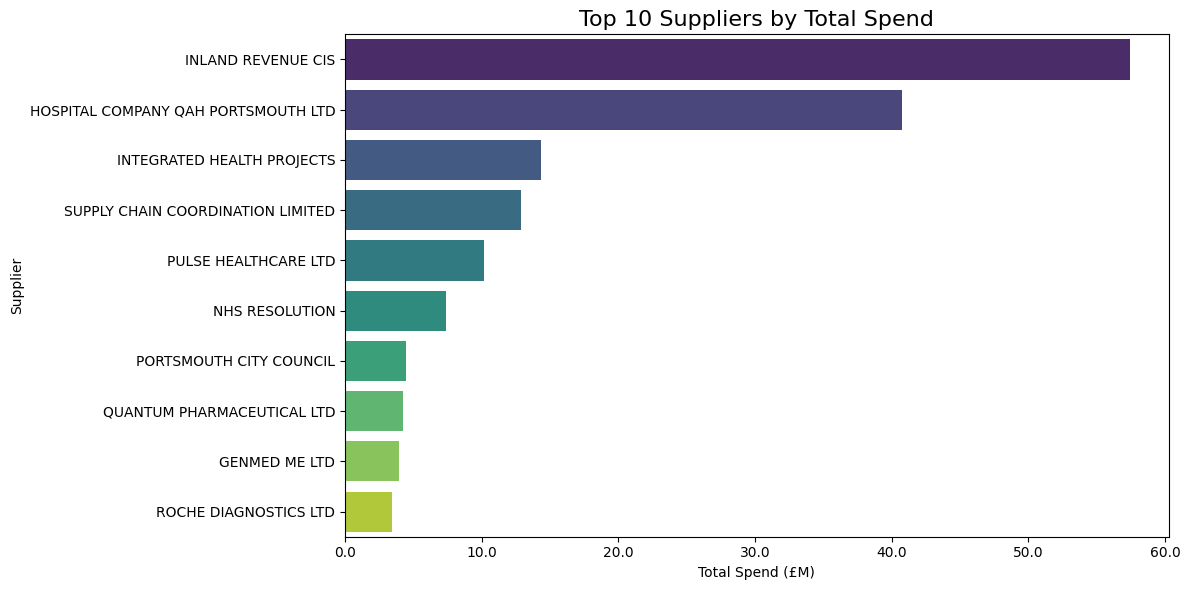

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

top_suppliers_millions = top_suppliers / 1_000_000

plt.figure(figsize=(12,6))

sns.barplot(x=top_suppliers_millions.values, 
            y=top_suppliers_millions.index, 
            hue=top_suppliers_millions.index,
            dodge=False,                       
            palette="viridis", 
            legend=False)

plt.title("Top 10 Suppliers by Total Spend", fontsize=16)
plt.xlabel("Total Spend (£M)")
plt.ylabel("Supplier")

plt.gca().xaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'))

plt.tight_layout()
plt.show()


In this chart I investigate the two top suppliers to deduce that they are a result of of insurance and operational spends. These can be ignored to focus on the suppliers of products and services.

In [9]:
top_2_suppliers = supplier_totals.head(2).index.tolist()
print("Top 2 suppliers:", top_2_suppliers)

for supplier in top_2_suppliers:
    print(f"\nTransactions for {supplier}:")
    display(
        combined_df[combined_df['Supplier'] == supplier]
        .sort_values('Total', ascending=False)
    )


Top 2 suppliers: ['INLAND REVENUE CIS', 'HOSPITAL COMPANY QAH PORTSMOUTH LTD']

Transactions for INLAND REVENUE CIS:


,Department Family,Entity,Date,Expense Type,Expense Area,Supplier,Transaction Number,Total
344,Department of Health,Portsmouth Hospitals University NHS Trust,2024-12-31,Income tax - Current,Balance Sheet,INLAND REVENUE CIS,53075611,7645771.05
91,Department of Health,Portsmouth Hospitals University NHS Trust,2025-04-30,Income tax - Current,Balance Sheet,INLAND REVENUE CIS,54129587,6174244.59
766,Department of Health,Portsmouth Hospitals University NHS Trust,2025-01-31,Income tax - Current,Balance Sheet,INLAND REVENUE CIS,53271079,6069541.34
964,Department of Health,Portsmouth Hospitals University NHS Trust,2025-03-31,Income tax - Current,Balance Sheet,INLAND REVENUE CIS,53874829,5986172.31
345,Department of Health,Portsmouth Hospitals University NHS Trust,2024-12-31,National Insurance - Curr,Balance Sheet,INLAND REVENUE CIS,53075611,5977690.76
519,Department of Health,Portsmouth Hospitals University NHS Trust,2025-02-28,Income tax - Current,Balance Sheet,INLAND REVENUE CIS,53555407,5952692.08
92,Department of Health,Portsmouth Hospitals University NHS Trust,2025-04-30,National Insurance - Curr,Balance Sheet,INLAND REVENUE CIS,54129587,5224080.92
767,Department of Health,Portsmouth Hospitals University NHS Trust,2025-01-31,National Insurance - Curr,Balance Sheet,INLAND REVENUE CIS,53271079,5195754.12
520,Department of Health,Portsmouth Hospitals University NHS Trust,2025-02-28,National Insurance - Curr,Balance Sheet,INLAND REVENUE CIS,53555407,5165252.97
965,Department of Health,Portsmouth Hospitals University NHS Trust,2025-03-31,National Insurance - Curr,Balance Sheet,INLAND REVENUE CIS,53874829,5158826.83



Transactions for HOSPITAL COMPANY QAH PORTSMOUTH LTD:


,Department Family,Entity,Date,Expense Type,Expense Area,Supplier,Transaction Number,Total
312,Department of Health,Portsmouth Hospitals University NHS Trust,2024-12-31,Other Liabilities - Curr,Balance Sheet,HOSPITAL COMPANY QAH PORTSMOUTH LTD,53017408,10718100.40
945,Department of Health,Portsmouth Hospitals University NHS Trust,2025-03-31,Other Liabilities - Curr,Balance Sheet,HOSPITAL COMPANY QAH PORTSMOUTH LTD,53829466,9081828.11
511,Department of Health,Portsmouth Hospitals University NHS Trust,2025-02-28,Other Liabilities - Curr,Balance Sheet,HOSPITAL COMPANY QAH PORTSMOUTH LTD,53527563,8689075.36
788,Department of Health,Portsmouth Hospitals University NHS Trust,2025-01-31,Other Liabilities - Curr,Balance Sheet,HOSPITAL COMPANY QAH PORTSMOUTH LTD,53298698,8337614.30
62,Department of Health,Portsmouth Hospitals University NHS Trust,2025-04-30,Other Liabilities - Curr,Balance Sheet,HOSPITAL COMPANY QAH PORTSMOUTH LTD,54089379,7808436.90
70,Department of Health,Portsmouth Hospitals University NHS Trust,2025-04-30,Bldg Ctrcts - PFI Svc Chg,THC Unitary Charge,HOSPITAL COMPANY QAH PORTSMOUTH LTD,54102279,-172205.00
69,Department of Health,Portsmouth Hospitals University NHS Trust,2025-04-30,AUC NBV BF,Balance Sheet,HOSPITAL COMPANY QAH PORTSMOUTH LTD,54102277,-3696110.00


These graphs show the distribution of spend by expense type. We can see that the majority is from current Non-NHS payables, payments towards transactions not yet fulfilled. After that, various other types such as computer maintenance and software.

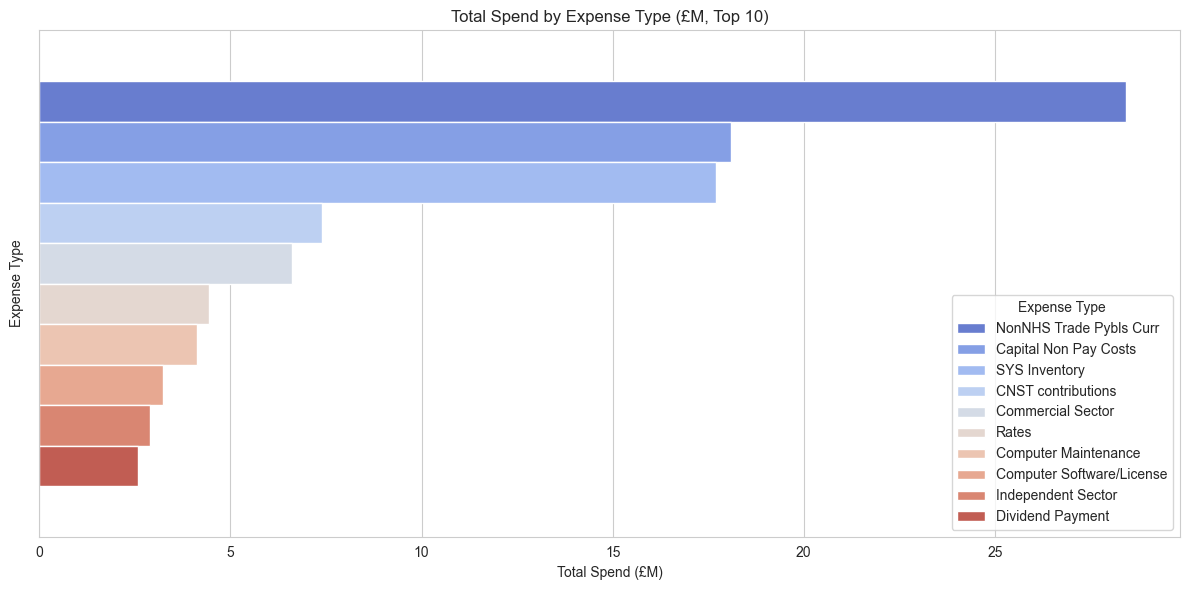

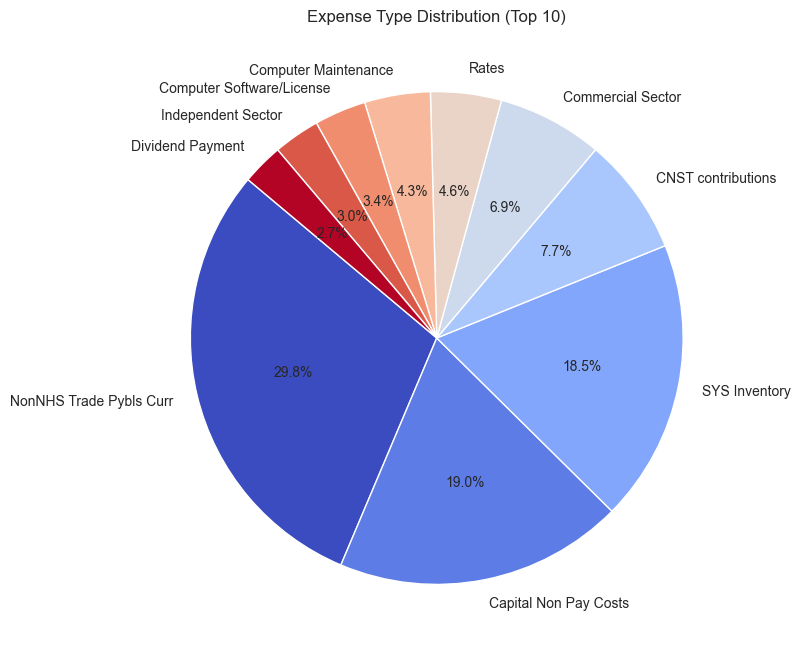

In [10]:
sns.set_style("whitegrid")

top_2_suppliers = combined_df.groupby('Supplier')['Total'].sum().sort_values(ascending=False).head(2).index
df_filtered = combined_df[~combined_df['Supplier'].isin(top_2_suppliers)]

expense_totals = df_filtered.groupby('Expense Type')['Total'].sum().sort_values(ascending=False)
expense_totals_millions = expense_totals / 1_000_000

top_n = 10
top_expenses = expense_totals_millions.head(top_n)

plt.figure(figsize=(12,6))
sns.barplot(x=top_expenses.values, hue=top_expenses.index, palette="coolwarm")
plt.title("Total Spend by Expense Type (£M, Top 10)")
plt.xlabel("Total Spend (£M)")
plt.ylabel("Expense Type")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,8))
top_expenses.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='coolwarm', legend=False)
plt.ylabel('')
plt.title("Expense Type Distribution (Top 10)")
plt.show()
